In [1]:
import os
os.chdir('/Users/zhanwenxin/Documents/GitHub/canari')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
samples = pd.read_csv('data/hsl_tsad_training_samples/hsl_synthetic_samples.csv')
samples['LTd_history'] = samples['LTd_history'].apply(lambda x: list(map(float, x[1:-1].split(','))))
# Convert samples['anm_develop_time'] to float
samples['anm_develop_time'] = samples['anm_develop_time'].apply(lambda x: float(x))

# Shuffle samples
samples = samples.sample(frac=1).reset_index(drop=True)

# Target list
target_list = ['itv_LT', 'itv_LL', 'anm_develop_time']

num_plot_samples = 1000

samples_input = np.array(samples['LTd_history'].values.tolist(), dtype=np.float32)[0:num_plot_samples]
samples_target = np.array(samples[target_list].values, dtype=np.float32)[0:num_plot_samples]


# Convert samples_target[:, 2] to grayscale that will be used later in the plot
grayscale_anm_dev_time = (samples_target[:, 2] - samples_target[:, 2].min()) / (samples_target[:, 2].max() - samples_target[:, 2].min())

In [3]:
# # Plot a 3d graph with grayscale_anm_dev_time as the third dimension, the first and second dimensions are samples_input
# fig = plt.figure(figsize=(12, 6))
# gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# ax1 = fig.add_subplot(gs[0], projection='3d')
# for i in range(samples_input.shape[0]):
#     ax1.plot(np.arange(len(samples_input[i])), samples_input[i], grayscale_anm_dev_time[i], color='black', alpha=0.5)
# # ax1.set_xlabel('LTd_history[0]')
# # ax1.set_ylabel('LTd_history[1]')

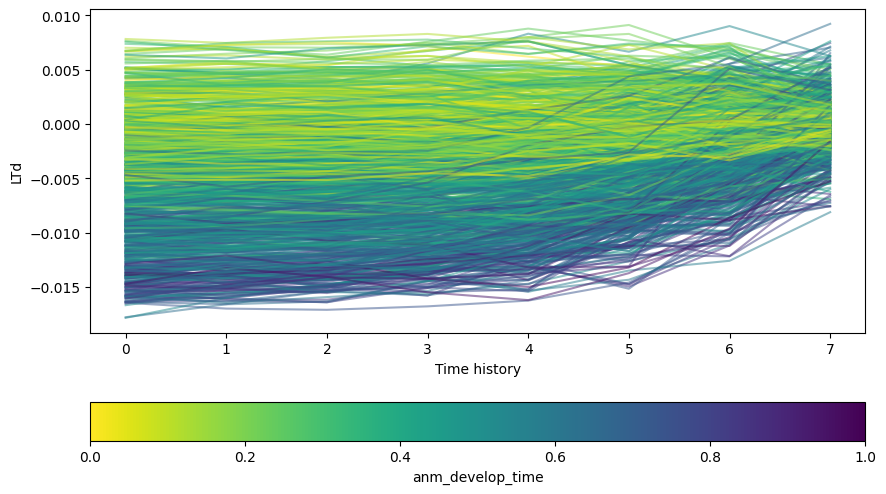

In [4]:
# Plot all samples input
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0])
# ax.plot(samples_input.T, color='black', alpha=0.1)
# Plot samples_input with color based on grayscale_anm_dev_time
for i in range(samples_input.shape[0]):
    ax.plot(samples_input[i], color=plt.cm.viridis_r(grayscale_anm_dev_time[i]), alpha=0.5)
ax.set_xlabel('Time history')
ax.set_ylabel('LTd')
# Plot the color map
fig.colorbar(plt.cm.ScalarMappable(cmap='viridis_r'), ax=ax, orientation='horizontal', label='anm_develop_time')
